Author: Nedal Mohammad

# Description

## Background and Context

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

## Objective

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

## Data Description

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

## Data Dictionary

* CustomerId: Unique ID which is assigned to each customer
* Surname: Last name of the customer 
* CreditScore: It defines the credit history of the customer.  
* Geography: A customer’s location    
* Gender: It defines the Gender of the customer   
* Age: Age of the customer     
* Tenure: Number of years for which the customer has been with the bank
* NumOfProducts: It refers to the number of products that a customer has purchased through the bank.
* Balance: Account balance
* HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.
* EstimatedSalary: Estimated salary 
* isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )
* Excited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values: 
                    0=No ( Customer did not leave the bank )

                    1=Yes ( Customer left the bank )



In [1]:
#IMPORTS
import tensorflow as tf
print('Code written using tensorflow version :', tf.__version__)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from sklearn.decomposition import PCA
import seaborn as sns
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
#random imports
import warnings
warnings.filterwarnings('ignore')

Code written using tensorflow version : 2.6.0


In [2]:
BankChurn=pd.read_csv('bank.csv')

In [3]:
data=BankChurn.copy()

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


We can see that all the columns have a non-null count equal to 10000 indicating that there probably aren't any missing values.

In [6]:
print('The data has', data.shape[1], 'columns', 'and', data.shape[0], 'rows')

The data has 14 columns and 10000 rows


Running baseline checks below on certain columns whose datatype might be worth changing to save memory.

In [7]:
data['Geography'].unique() #checking the unique values for geography

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
data['Surname'].nunique() #finding the number of unique last names registered with the database

2932

In [9]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [10]:
data['HasCrCard'].unique()

array([1, 0], dtype=int64)

In [11]:
data['IsActiveMember'].unique()

array([1, 0], dtype=int64)

In [12]:
data['Surname']=data['Surname'].astype('category') #will probably drop this, but for now we can make it categorical
data['Geography']=data['Geography'].astype('category') #represents a categorical feature
data['Gender']=data['Gender'].astype('category') # flag identifier is categorical
data['Exited']=data['Exited'].astype('category') # flag identifier is categorical
data['HasCrCard']=data['HasCrCard'].astype('category') # flag identifier is categorical
data['IsActiveMember']=data['IsActiveMember'].astype('category') # flag identifier is categorical

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


**Observations:**
* CreditScore - The average client has an average credit score of 650, while the median is 652. This indicates that there isn't any skew present. The credit score values for the clients range from 350 to 850.
* Age - The average customer's age is 39, while the mean in 37. This indicates that there isn't any skew present. The ages of the clients range from 18 to 92.
* Tenure - The average client has about 5 years tenure with the bank while the median is 7 years. There is some skew here indicating more new clients than old clients. The tenure time of the customers ranges from 0 to 10 years.
* Balance - The average client has a balance of 76,485 while the median has a balance of 97,198. There is some skew here indicating that there are more lower balance clients than higher balance clients. The balances range from 62,397 to 250,898.
* NumOfProducts - The average number of products that a client has purchased from the bank is between 1 and 2 at 1.53 while the median is 1. There is some skew here indicating a tail on the distribution towards clients buying a high number of products through the bank. The values range from 0 to 4.
* Estimated Salary - The average estimated salary of the clients is 100,090 while the median is 100,193. This indicates that there isn't any skew present. The values range from 11.58 to 199,992.

Before removing unique row identifiers embedded in the dataframe, we should check for duplicate rows:

In [14]:
data.duplicated().sum()

0

A quick overview of all columns and datatypes to verify everything is in order and quantify memory usage reduction.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  int64   
 1   CustomerId       10000 non-null  int64   
 2   Surname          10000 non-null  category
 3   CreditScore      10000 non-null  int64   
 4   Geography        10000 non-null  category
 5   Gender           10000 non-null  category
 6   Age              10000 non-null  int64   
 7   Tenure           10000 non-null  int64   
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  int64   
 10  HasCrCard        10000 non-null  category
 11  IsActiveMember   10000 non-null  category
 12  EstimatedSalary  10000 non-null  float64 
 13  Exited           10000 non-null  category
dtypes: category(6), float64(2), int64(6)
memory usage: 796.9 KB


Checking for blatantly null values in the data set

In [16]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There are no blatant nulls present, but I did notice some strange things happening in the categorical feature Surname. I am going to create a new column representing wheter or not the Surname column has any characters besides 'A'-'Z' or 'a'-'z'.

In [17]:
data['bool_presence']=data['Surname'].str.isalpha() #creating a column which detects non letter characters in the surname column

In [18]:
data[data['bool_presence']== False] #viewing all of the rows in which surname has non letter characters

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,bool_presence
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,False
52,53,15683553,O'Brien,788,France,Female,33,5,0.00,2,0,0,116978.19,0,False
58,59,15623944,T'ien,511,Spain,Female,66,4,0.00,1,1,0,1643.11,1,False
109,110,15744689,T'ang,479,Germany,Male,35,9,92833.89,1,1,0,99449.86,1,False
183,184,15810845,T'ang,636,France,Male,42,2,0.00,2,1,1,55470.78,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9958,9959,15657771,Ts'ui,537,France,Male,37,6,0.00,1,1,1,17802.42,0,False
9966,9967,15590213,Ch'en,479,Spain,Male,35,4,125920.98,1,1,1,20393.44,0,False
9972,9973,15747927,Ch'in,758,France,Male,26,4,155739.76,1,1,0,171552.02,0,False
9978,9979,15703563,P'eng,774,France,Male,40,9,93017.47,2,1,0,191608.97,0,False


We can see there are 401 rows which has a non letter character in Surname. Most of them are apostrophes which is completely fine but we discover that some values are a single letter and have a '?' after it. Let's view those entries specifically.

In [19]:
data[data['Surname'].str.endswith('?') ==True].sample(10) #a random sample of 10 rows with this issue

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,bool_presence
3176,3177,15613014,Hs?,722,Germany,Male,29,1,107233.85,2,1,0,24924.92,0,False
9633,9634,15668057,K?,669,France,Female,31,6,113000.66,1,1,0,40467.82,0,False
9910,9911,15784042,L?,624,France,Male,55,7,118793.60,1,1,1,95022.02,1,False
5423,5424,15749671,K?,794,France,Male,35,6,0.00,2,1,1,68730.91,0,False
5419,5420,15594456,K?,740,Spain,Female,56,4,99097.33,1,1,1,85016.64,1,False
8191,8192,15759480,H?,644,France,Female,40,10,139180.97,1,1,1,19959.67,0,False
1969,1970,15671930,H?,717,France,Female,36,5,0.00,2,1,1,145551.60,0,False
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,False
9792,9793,15787168,Y?,819,Spain,Female,28,8,168253.21,1,1,1,102799.14,0,False
437,438,15624623,Hs?,516,France,Male,35,10,104088.59,2,0,0,119666.00,0,False


We can see that there are many data entry mistakes where the Surname has a '?' concatenated to the end of it. It appears that only the last initial is available for most of these cases. I don't believe this information will be influential in determining whether a customer will churn or not. At most, some surnames might indicate wealth or other familial aspects. Perhaps a feature selection algorithm can lead to only a few surnames that indicate outlier behavior in the data, and all the rest can be dropped. In either case, for the first pass through this dataset I will drop the column as a whole and see the performance.

In [20]:
data.drop(['RowNumber'],axis=1,inplace=True) #This column is not useful
data.drop(['CustomerId'],axis=1,inplace=True) #This column is not useful
data.drop(['Surname'],axis=1,inplace=True) #This column is not useful

In [21]:
data.drop(['bool_presence'],axis=1, inplace=True) #This column was created to see variances in Surname and is no longer needed

In [22]:
print('The data has', data.shape[1], 'columns', 'and', data.shape[0], 'rows')
data.head()

The data has 11 columns and 10000 rows


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Now, We can perform Exploratory Data Analysis:

# Exploratory Data Analysis

## Univariate Analysis

The goal of univariate analysis is to look at the overall distribution of each feature to be included in analysis. Here we can detect statistical outliers and skew in the numerical features as well as the class distribution of categorical features. To accomplish this we will use the following function for numerical features to plot a boxplot and histogram along the same scale:

In [23]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

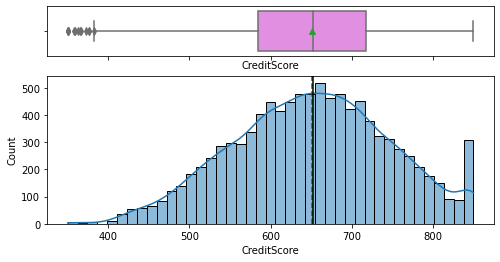

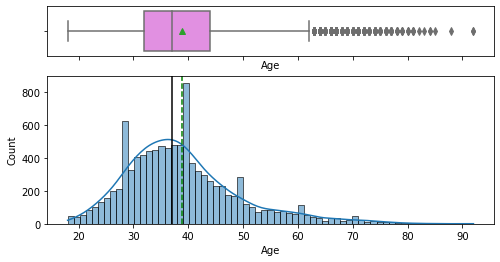

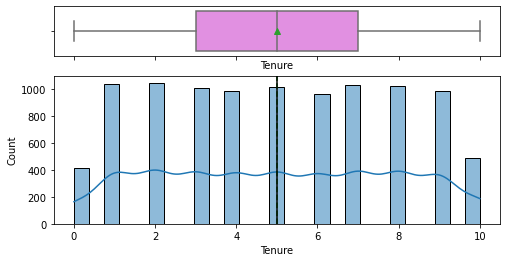

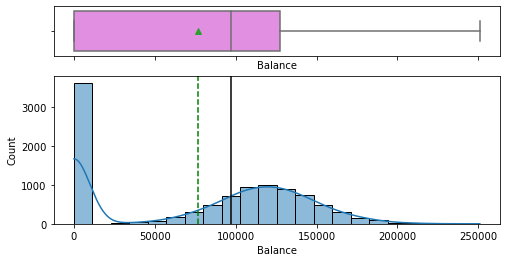

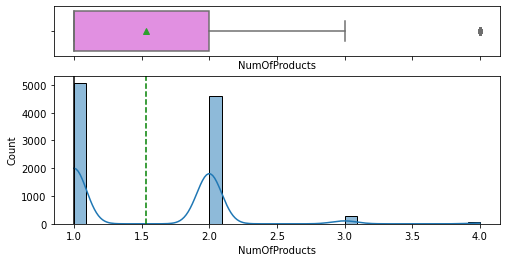

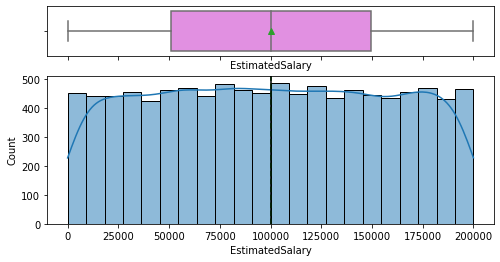

In [24]:
# selecting numerical columns
num_col = data.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(data, item, kde=True, figsize=(8, 4))

**Observations:**
* CreditScore - The mean and median are very close here. There is no skew. There are some outliers with a low credit score, however these are balanced by a spike of people with a high credit score at the other end of the plot. The outliers here represent a real world trend and therefore will not be manipulated. The overall distribution is fairly normal.
* Age - Most clients are younger than 50. The mean and median are once again very close indicating minimal skew. There are some outliers on the older end of the plot resulting in a very long tail. The outliers in age represent a real world trend and will not be touched. The overall distribution is fairly normal.
* Tenure - For tenure we see a uniform distribution. There are no outliers and there is no skew in the feature. 
* Balance - This feature has a mainly normal distribution however there is a very sharp spike for lower balance clients. This is causing a relatively large left skew with mean < median. There aren't any outleiers present.
* NumOfProducts - The mean > median indicates a right skew. There aren't any outliers present. 
* EstimatedSalary -This feature has a uniform distribution with mean = median indicating no skew. There also are not any outliers. 

The function below will be used to create a barplot representing class distribution for categorical variables.

In [25]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

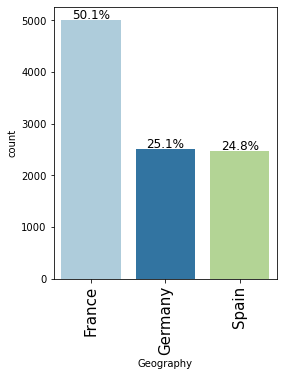

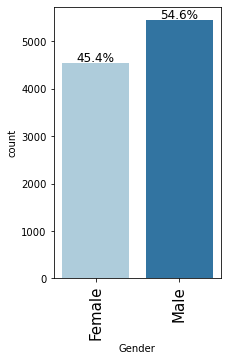

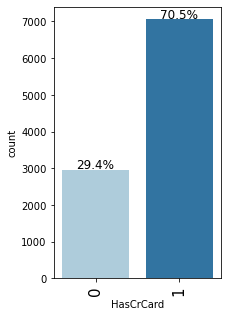

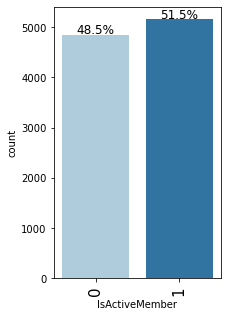

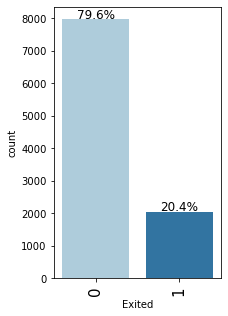

In [26]:
cat_col = data.select_dtypes(include='category').columns.tolist()
for item in cat_col:
    labeled_barplot(data, item, perc=True)

**Observations:**
* Geography - About half of the clients are located in France while a quarter are located in Germany and Spain.
* Gender - 54.6% of the clients are male while 45.4% are female
* HasCrCard - 70.5% of the clients have a credit card while 29.4% do not.
* IsActiveMember - 48.5% of the clients don't actually use the banks services often, while 51.5% do. The bank should aim to increase this number of people if it wishes to reduce the number of clients exiting.
* Exited - 79.6% of the clients did not exit while 20.4% did.

#### We make special note here for the target variable
For the exited feature which is our target we see a large distinction between the number of people in class 0 than in class 1. The target class within this feature is 1, or customers that have exited, which also happens to be the minority class. This will make it difficult to train the ANN and class weighting will most probably have to be considered. Hopefully, our features will be good predictors of our target and we can still wonclude this notebook with a high performance ANN.

## Bivariate Analysis

The goal of bivariate analysis is to view correlations and trends between features

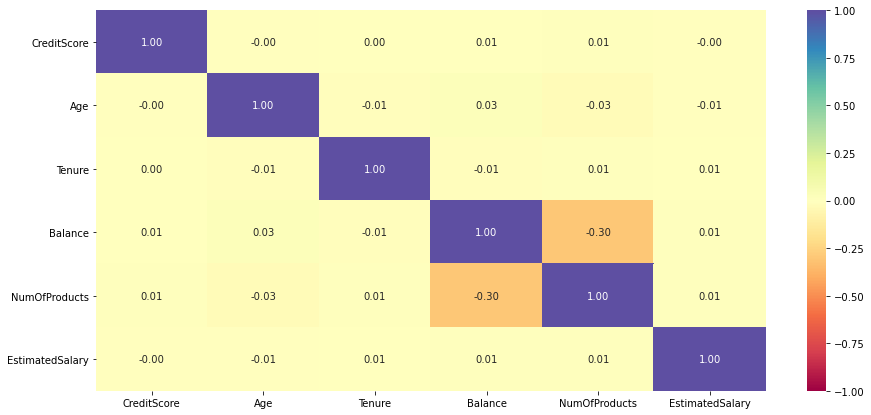

In [27]:
plt.figure(figsize=(15, 7))
sns.heatmap(data[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

From the heat map, we can determine that there are no linear correlations between the predictive features. We can view a pairplot to see if the correlations really don't exist and appear on scatterplots as a cloud of points or if there are some nonlinear trends.

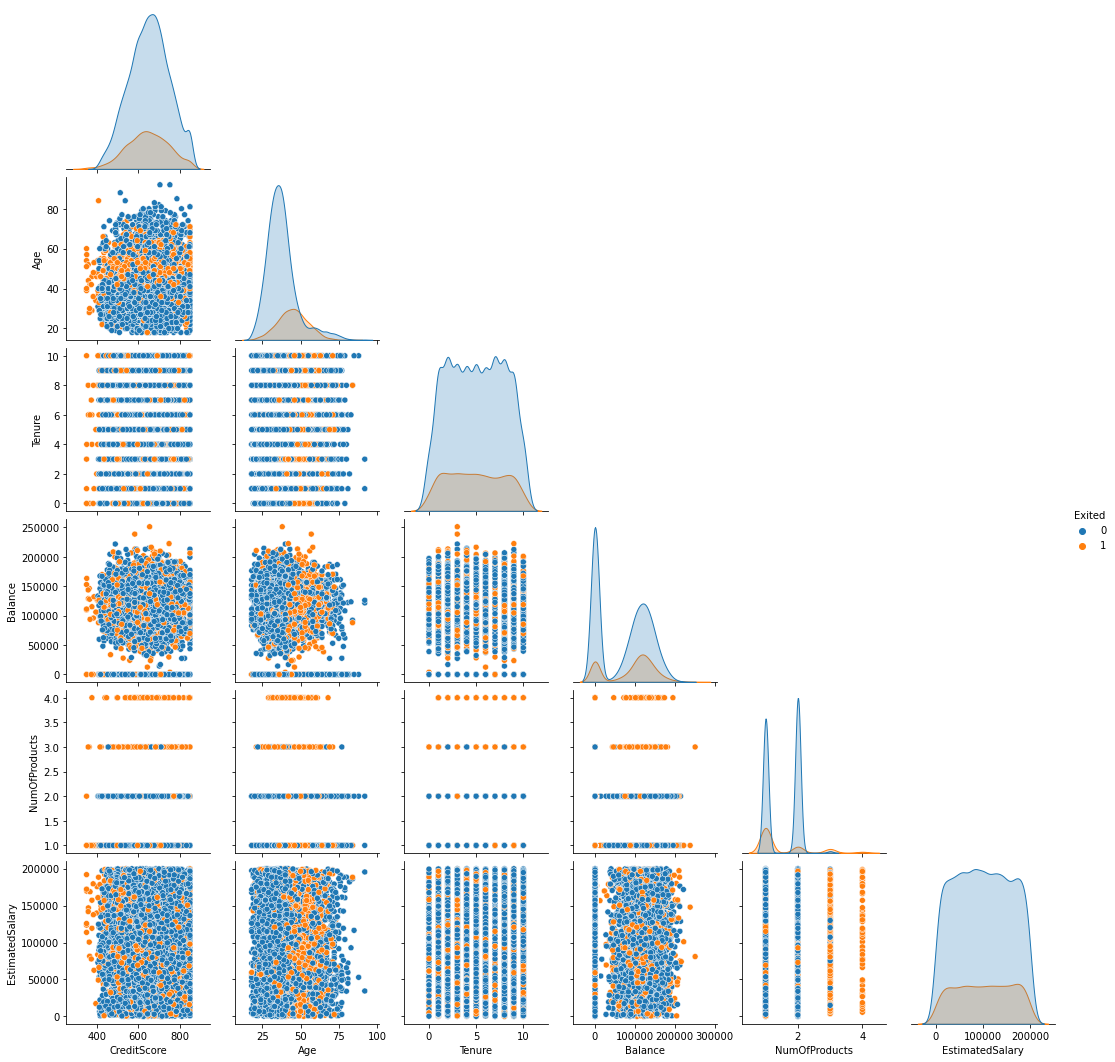

In [28]:
sns.pairplot(data=data, diag_kind="kde", corner=True, hue='Exited', vars=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'])
plt.show()

**Observations:**
* The following observations can be made from the above plots

* Most of the clients exiting are middleaged (40-60).
* Tenure does not seem to be correlated to any feature. Perhaps consider creating a new feature which is Age/Tenure and check again for correlations.
* Balance also appears to not be correlated to any feature. 
* People who use the most of the banks products are primarily the ones that are exiting. 
* Estimated salary also appears uncorrelated with any feature.
* Credit score appears uncorrelated with any other feature also. 

Considerations:
These features appear to be poor predictors of the target. That coupled with a class imbalance in the target means a reliable model will most likely be difficult to come by. We can consider feature engineering two features at least. Perhaps a feature could be Age/Tenure and another could be Estimated salary/credit score.

Let's compare every feature to our target variable:

In [29]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['Exited'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['Exited'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

Let's view the categoricals first:

Exited        0     1    All
Geography                   
France     4204   810   5014
Germany    1695   814   2509
Spain      2064   413   2477
All        7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


<Figure size 1440x1440 with 0 Axes>

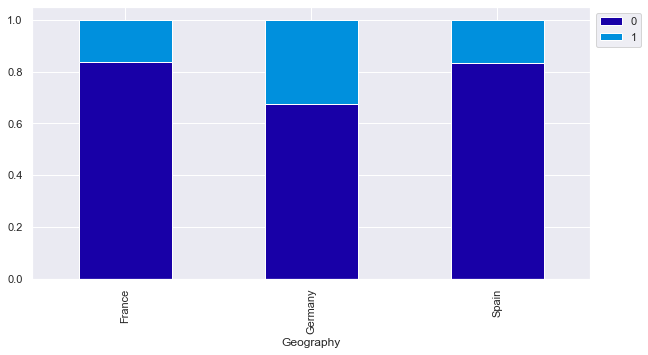

Exited     0     1    All
Gender                   
Female  3404  1139   4543
Male    4559   898   5457
All     7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


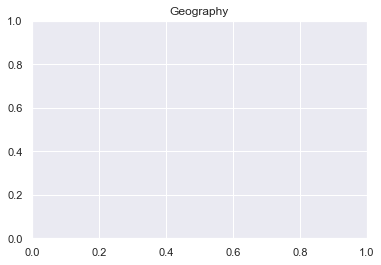

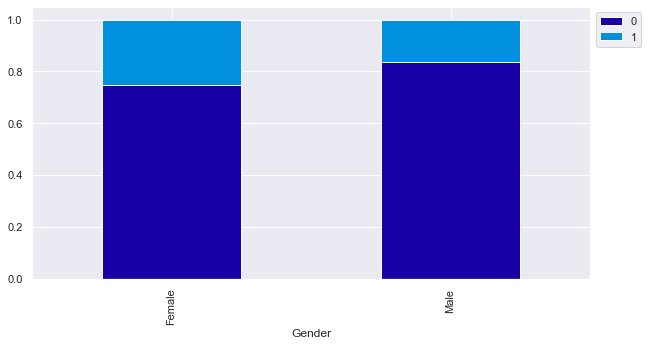

Exited        0     1    All
HasCrCard                   
0          2332   613   2945
1          5631  1424   7055
All        7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


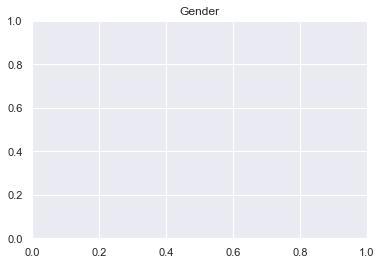

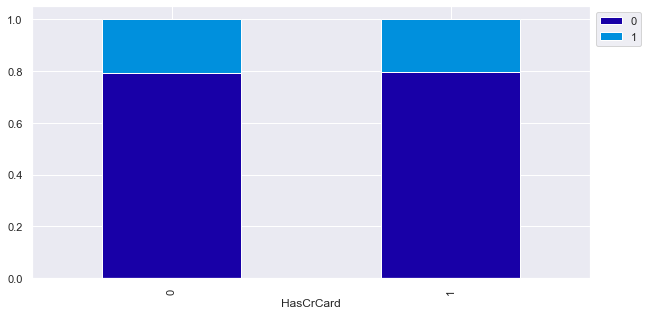

Exited             0     1    All
IsActiveMember                   
0               3547  1302   4849
1               4416   735   5151
All             7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


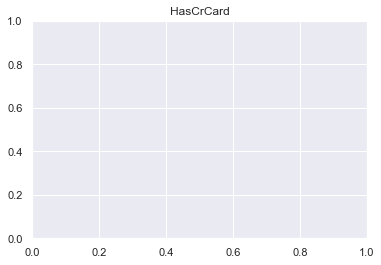

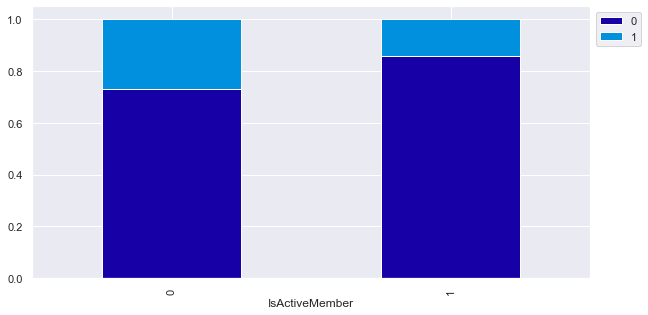

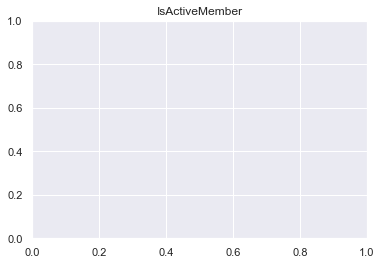

In [30]:

plt.figure(figsize=(20,20))

for i, variable in enumerate(['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']):
                     #plt.subplot(2,2,i+1)
                     stacked_plot(data[variable])
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

**Observations:**
* Geography - Exiting does seem to depend on location. People located in Germany appear to exit more often then France and Spain
* Gender - A larger proportion of Females are exiting from the bank than males.
* HasCrCard - Wheter a client has a credit card or not does not seem to affect their decision to exit
* IsActiveMember - A smaller proportion of the Active clients are exiting than the non active clients.

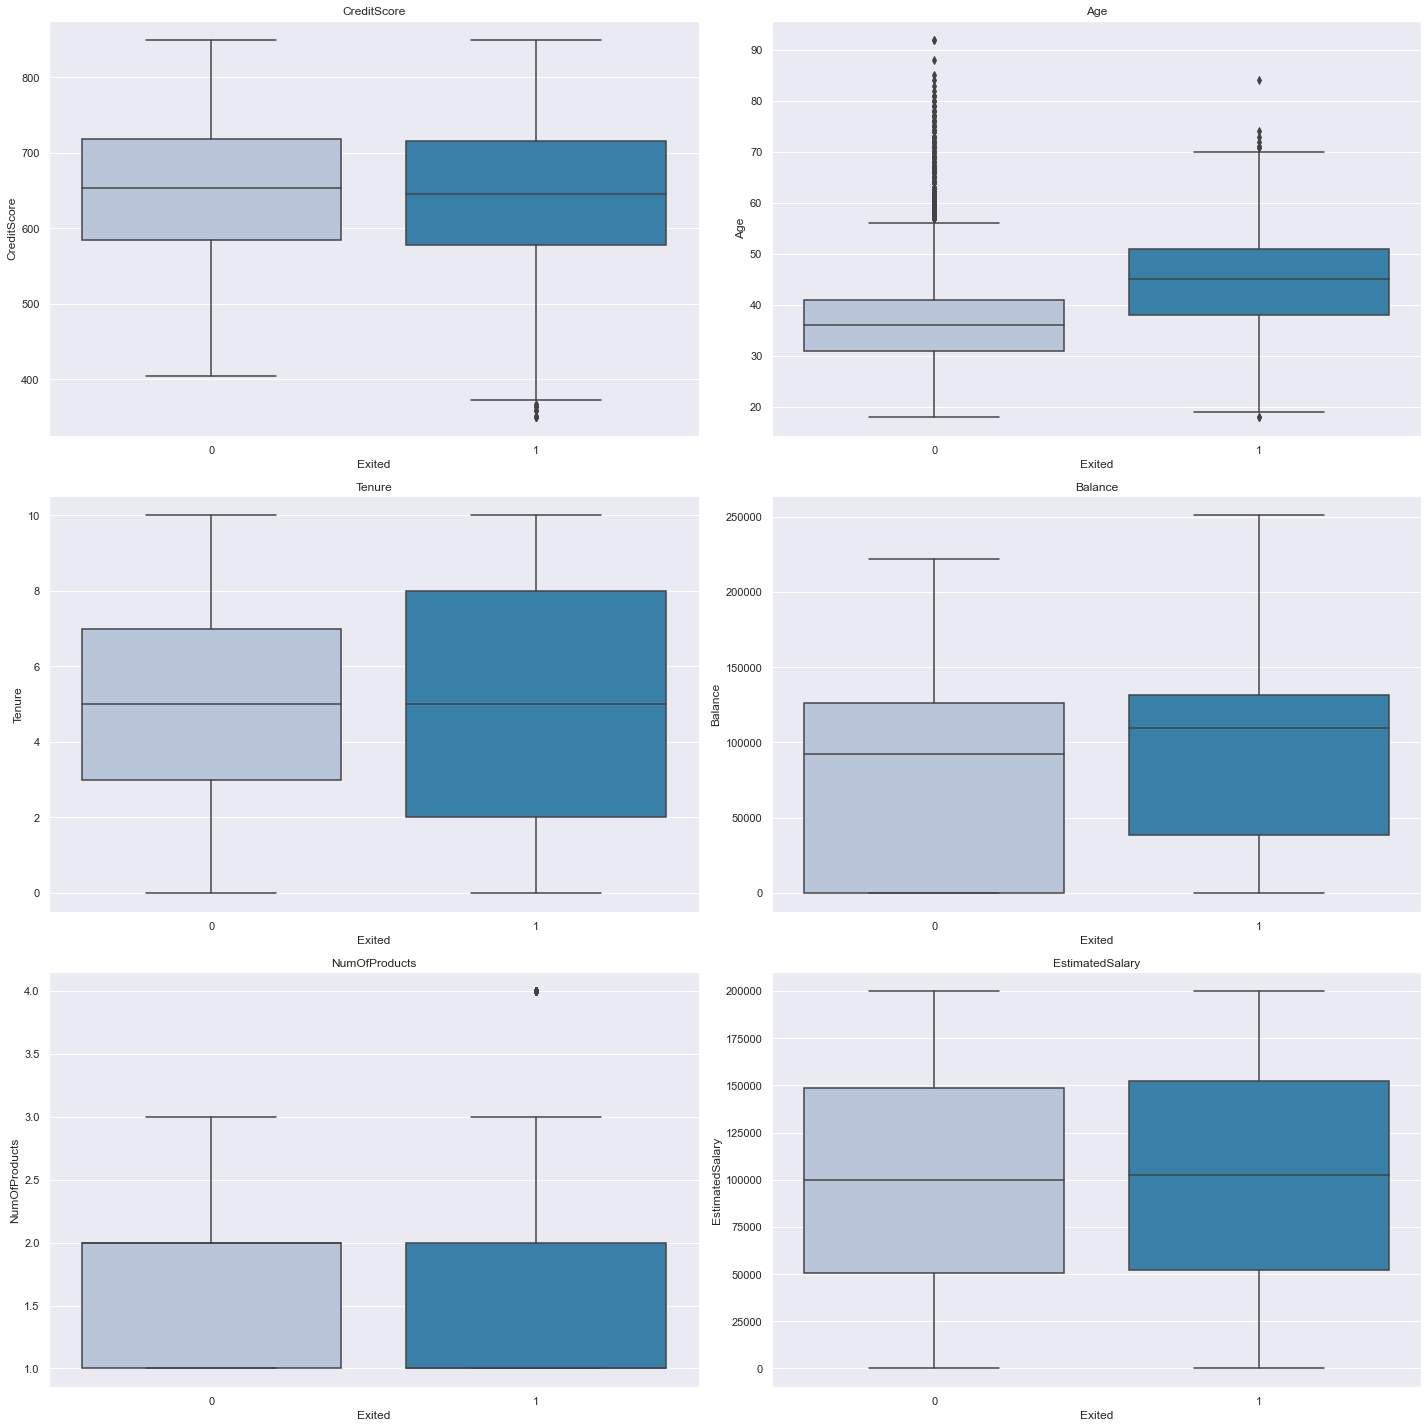

In [31]:
plt.figure(figsize=(20,20))

for i, variable in enumerate(num_col):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["Exited"],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

**Observations:**
* CreditScore - Credit Scores for people who exit appear to be ever so slightly lower. Hardly even noticable.
* Age - Clients who are exiting have a higher median age
* Tenure - The 25 to 75 percentile range is larger for the clients who are exiting but other than that, there isn't a clear trend present.
* Balance - The median balance for clients who are exiting is larger than the median balance for clients that are not exiting. This is not good for the bank.
* NumOfProducts - The plots are almost identical, except you do notice that everyone who purchased 4 products from the bank (the most) followed that decision by exiting. This is not good for the bank.
* EstimatedSalary- The median estimated salary is ever so slightly higher for customers who are exiting. Hardly even noticable.


# Data Pre-Processing

First split the data. We will use 3 sets of data to avoid data leakage.

Lets create the two new features discussed earlier:

In [32]:
data['Ten_Age']=data['Tenure']/data['Age']
data['sal_cred']=data['EstimatedSalary']/data['CreditScore']

Let's quickly view their distributions and correlations with the target:

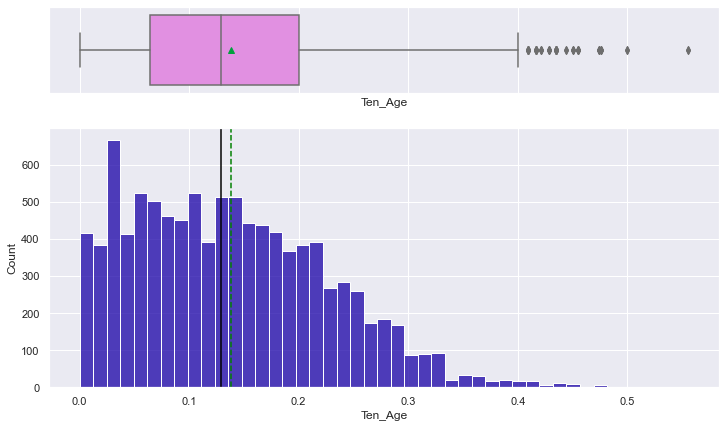

In [33]:
histogram_boxplot(data, 'Ten_Age')

<AxesSubplot:xlabel='Exited', ylabel='Ten_Age'>

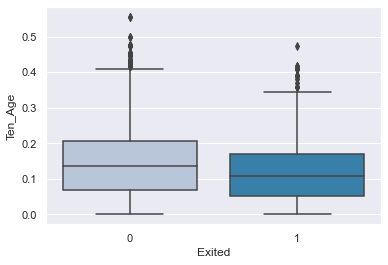

In [34]:
sns.boxplot(data["Exited"],data['Ten_Age'],palette="PuBu")

This feature appears to distinguish more than either the tenure feature did on its own.

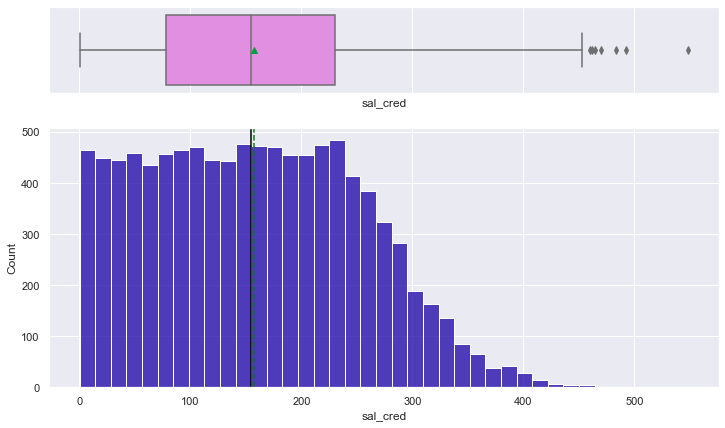

In [35]:
histogram_boxplot(data, 'sal_cred')

<AxesSubplot:xlabel='Exited', ylabel='sal_cred'>

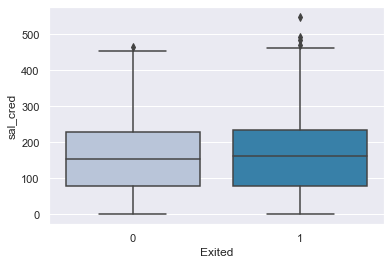

In [36]:
sns.boxplot(data["Exited"],data['sal_cred'],palette="PuBu")

Not much of an improvement but we can give it a try.

Now that we have created these features, we need to remove the features used to generate them. This is because the ANN could be harmed by multicollinearity between features.

In [37]:
#data.drop(['CreditScore'],axis=1,inplace=True) #This column was used to generate a new feature
#data.drop(['Tenure'],axis=1,inplace=True) #This column was used to generate a new feature
#data.drop(['EstimatedSalary'],axis=1,inplace=True) #This column was used to generate a new feature
#data.drop(['Age'],axis=1,inplace=True) #This column was used to generate a new feature
data.drop(['Ten_Age'],axis=1,inplace=True)
data.drop(['sal_cred'],axis=1,inplace=True)

Despite Attempting to Improve the ANN these features actually made the model less accurate. I will leave this all here for documentation purposes only and continue on with what overall yielded the best model. This is why you can see the commented out lines of code and I actually dropped the features I engineered.

In [38]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


These are the features that will be used for modelling.

Note:  adding those other features decreased recall by about 10%

In [39]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test
X=data.drop(columns='Exited')
Y=data['Exited']

X_temp, X_test, y_temp, y_test = train_test_split(
    X, Y, test_size=0.15, random_state=1, stratify=Y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(6800, 10) (1700, 10) (1500, 10)
(6800,) (1700,) (1500,)


### Encode Categorical Features

In [40]:
# Creating dummy variables for categorical variables
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_val = pd.get_dummies(data=X_val, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)

In [41]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1,IsActiveMember_1
6892,649,56,8,156974.26,1,89405.26,0,0,0,1,0
4773,646,35,1,121952.75,2,142839.82,1,0,0,1,1
1943,728,39,6,152182.83,1,161203.60,1,0,1,0,0
727,711,25,7,0.00,3,9679.28,0,0,0,1,1
3093,627,41,5,100880.76,1,134665.25,0,1,1,0,1


### Outlier Treatment

No outlier treatment will be considered for this project.

### Scaling

In [42]:
ss=StandardScaler() #instantiate the scaler
ss.fit(X_train) #derive a transformation from training data

#transform all sets of data with transformation
X_train=ss.transform(X_train)
X_val=ss.transform(X_val)
X_test=ss.transform(X_test)

# Building the Model

## Model evaluation criterion:
#### Model can make wrong predictions as:
1. Predicting a customer will leave the bank and the customer doesn't leave the bank - Loss of resources
2. Predicting a customer will not leave the bank and the customer leaves the bank - Loss of customer/income

#### Which case is more important?
* Predicting that customer will not leave the bank but he leaves the bank i.e. losing on a potential source of income for the company because that customer will not be targeted by the marketing team when he should be targeted.

#### How to reduce this loss i.e need to reduce False Negatives?
* Company wants Recall to be maximized, greater the Recall lesser the chances of false negatives.

### Creating a model

* Keras model object can be created with Sequential class

* At the outset, the model is empty per se. It is completed by adding additional layers and compilation

In [43]:
#initialize the model
model = Sequential()

### Adding layers [layers and activations]

* Keras layers can be added to the model

* Adding layers are like stacking lego blocks one by one

* It should be noted that as this is a classification problem, sigmoid layer (softmax for multi-class problems) should be added

In [44]:
print('The data has', X_train.shape[1], 'columns', 'and', X_train.shape[0], 'rows')

The data has 11 columns and 6800 rows


In [45]:
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(units=X_train.shape[1], input_dim = X_train.shape[1] ,activation='relu'))   # input of 29 columns as shown above
# hidden layer


model.add(Dense(121,activation='relu'))
model.add(Dense(121,activation='relu'))

# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (fraud or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1,activation='sigmoid')) # binary classification fraudulent or not


### Model compile [optimizers and loss functions]

* Keras model should be "compiled" prior to training

* Types of loss (function) and optimizer should be designated

In [46]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 121)               1452      
_________________________________________________________________
dense_2 (Dense)              (None, 121)               14762     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 122       
Total params: 16,468
Trainable params: 16,468
Non-trainable params: 0
_________________________________________________________________


### Training [Forward pass and Backpropagation]

In [48]:
#fitting the model
history=model.fit(X_train,y_train,batch_size=15,epochs=25,validation_split=0.2)

Epoch 1/25
363/363 [==============================] - 1s 2ms/step - loss: 0.4707 - accuracy: 0.7945 - recall: 0.0730 - precision: 0.4765 - val_loss: 0.4461 - val_accuracy: 0.8051 - val_recall: 0.1491 - val_precision: 0.5694
Epoch 2/25
363/363 [==============================] - 1s 2ms/step - loss: 0.4249 - accuracy: 0.8156 - recall: 0.2153 - precision: 0.6442 - val_loss: 0.4194 - val_accuracy: 0.8125 - val_recall: 0.2473 - val_precision: 0.5862
Epoch 3/25
363/363 [==============================] - 1s 1ms/step - loss: 0.3949 - accuracy: 0.8327 - recall: 0.3153 - precision: 0.7000 - val_loss: 0.3929 - val_accuracy: 0.8331 - val_recall: 0.2909 - val_precision: 0.7143
Epoch 4/25
363/363 [==============================] - 1s 2ms/step - loss: 0.3625 - accuracy: 0.8445 - recall: 0.3982 - precision: 0.7129 - val_loss: 0.3812 - val_accuracy: 0.8309 - val_recall: 0.3309 - val_precision: 0.6642
Epoch 5/25
363/363 [==============================] - 1s 2ms/step - loss: 0.3507 - accuracy: 0.8515 - re

Plotting the train and test loss

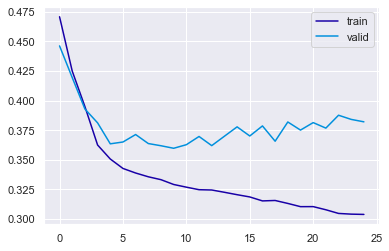

In [49]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

We can see that the model is over fitting the training data.

### Evaluation

* Keras model can be evaluated with evaluate() function

* Evaluation results are contained in a list

In [50]:
score = model.evaluate(X_val, y_val)

54/54 [==============================] - 0s 914us/step - loss: 0.3346 - accuracy: 0.8594 - recall: 0.4538 - precision: 0.7585


In [51]:
print(score)

[0.33461812138557434, 0.8594117760658264, 0.45375722646713257, 0.7584540843963623]


I'd like to see a confusion matrix showing how the customers were classified. This function will help me to do that:

In [52]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

Now we can generate the confusion matrix:

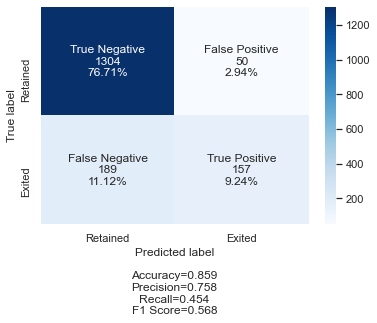

In [53]:
#This block of code controls the threshold. We will start with a threshold of 0.5
y_pred1 = model.predict(X_val)
for i in range(len(y_val)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm1=confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Retained','Exited']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Our baseline model is not doing a very good job. We have a few options to improve it:
1. Change Architecture of Neural Network
2. AUC ROC curves
3. Oversampling to deal with class imbalance


### Let's change the architecture of the Neural Network

There are some basic Hyperparameters which can help to get the better model performance.

#### Early stopping:

During training, the model is evaluated on a holdout validation dataset after each epoch. If the performance of the model on the validation dataset starts to degrade or no improvement (e.g. loss begins to increase or accuracy begins to decrease), then the training process is stopped after the certian interations.The model at the time that training is stopped is then used and is known to have good generalization performance.

This procedure is called “early stopping” and is perhaps one of the oldest and most widely used forms of neural network regularization.

#### Weight Initialization

Weight initialization is an important consideration in the design of a neural network model.

The nodes in neural networks are composed of parameters referred to as weights used to calculate a weighted sum of the inputs.

Neural network models are fit using an optimization algorithm called stochastic gradient descent that incrementally changes the network weights to minimize a loss function, hopefully resulting in a set of weights for the mode that is capable of making useful predictions.

This optimization algorithm requires a starting point in the space of possible weight values from which to begin the optimization process. Weight initialization is a procedure to set the weights of a neural network to small random values that define the starting point for the optimization (learning or training) of the neural network model.

There are many WI techniques as follows:

1) Random normal initialization

2) Random Uniform initialization

3) Xaviour Initialization

4) He Initialization

In [54]:
#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=15,
 
                             verbose=0, mode='min', restore_best_weights= True)


model2 = Sequential()
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model2.add(Dense(units=X_train.shape[1], input_dim =X_train.shape[1], kernel_initializer='he_normal', activation='relu'))   # input of 29 columns as shown above
# hidden layer
model2.add(Dense(units=121, kernel_initializer='he_normal', activation='relu'))
model2.add(Dense(units=121, kernel_initializer='he_normal', activation='relu'))
model2.add(Dropout(0.5))
#Adding Dropout to prevent overfitting 
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (fraud or not)
# We use the sigmoid because we want probability outcomes
model2.add(Dense(1,activation='sigmoid',kernel_initializer='he_normal'))  # binary classification fraudulent or not

# Create optimizer with default learning rate
# Compile the model
model2.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_5 (Dense)              (None, 121)               1452      
_________________________________________________________________
dense_6 (Dense)              (None, 121)               14762     
_________________________________________________________________
dropout (Dropout)            (None, 121)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 122       
Total params: 16,468
Trainable params: 16,468
Non-trainable params: 0
_________________________________________________________________


In [55]:
#fitting the model
his_mod2=model2.fit(X_train,y_train,batch_size=200,epochs=50,validation_split=0.2)

Epoch 1/50
28/28 [==============================] - 1s 12ms/step - loss: 0.8352 - accuracy: 0.6994 - recall_1: 0.2261 - precision_1: 0.2444 - val_loss: 0.5244 - val_accuracy: 0.7824 - val_recall_1: 0.1855 - val_precision_1: 0.4146
Epoch 2/50
28/28 [==============================] - 0s 4ms/step - loss: 0.5881 - accuracy: 0.7551 - recall_1: 0.2396 - precision_1: 0.3528 - val_loss: 0.4983 - val_accuracy: 0.7926 - val_recall_1: 0.0691 - val_precision_1: 0.4222
Epoch 3/50
28/28 [==============================] - 0s 3ms/step - loss: 0.5382 - accuracy: 0.7737 - recall_1: 0.2288 - precision_1: 0.4038 - val_loss: 0.4911 - val_accuracy: 0.7963 - val_recall_1: 0.0655 - val_precision_1: 0.4737
Epoch 4/50
28/28 [==============================] - 0s 2ms/step - loss: 0.5018 - accuracy: 0.7888 - recall_1: 0.2126 - precision_1: 0.4618 - val_loss: 0.4810 - val_accuracy: 0.8000 - val_recall_1: 0.0945 - val_precision_1: 0.5306
Epoch 5/50
28/28 [==============================] - 0s 2ms/step - loss: 0.4857 

28/28 [==============================] - 0s 2ms/step - loss: 0.3568 - accuracy: 0.8542 - recall_1: 0.4279 - precision_1: 0.7504 - val_loss: 0.4023 - val_accuracy: 0.8279 - val_recall_1: 0.3855 - val_precision_1: 0.6199
Epoch 37/50
28/28 [==============================] - 0s 2ms/step - loss: 0.3546 - accuracy: 0.8544 - recall_1: 0.4333 - precision_1: 0.7469 - val_loss: 0.4006 - val_accuracy: 0.8309 - val_recall_1: 0.3673 - val_precision_1: 0.6433
Epoch 38/50
28/28 [==============================] - 0s 2ms/step - loss: 0.3560 - accuracy: 0.8546 - recall_1: 0.4234 - precision_1: 0.7568 - val_loss: 0.3995 - val_accuracy: 0.8309 - val_recall_1: 0.3891 - val_precision_1: 0.6331
Epoch 39/50
28/28 [==============================] - 0s 2ms/step - loss: 0.3517 - accuracy: 0.8564 - recall_1: 0.4369 - precision_1: 0.7566 - val_loss: 0.3969 - val_accuracy: 0.8324 - val_recall_1: 0.3709 - val_precision_1: 0.6497
Epoch 40/50
28/28 [==============================] - 0s 2ms/step - loss: 0.3496 - accura

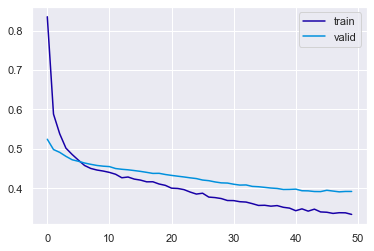

In [56]:
# Capturing learning history per epoch
hist  = pd.DataFrame(his_mod2.history)
hist['epoch'] = his_mod2.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

There is still over fitting occuring, however to a lesser degree.

54/54 [==============================] - 0s 2ms/step - loss: 0.3754 - accuracy: 0.8494 - recall_1: 0.4451 - precision_1: 0.7064
[0.3753769099712372, 0.8494117856025696, 0.4450867176055908, 0.7064220309257507]


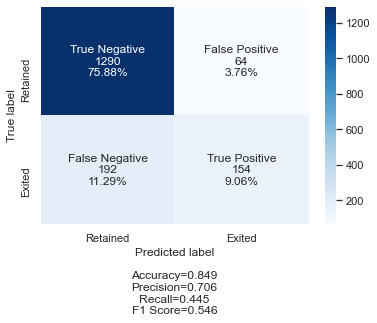

In [57]:
score = model2.evaluate(X_val, y_val)
print(score)

#This block of code controls the threshold. We will start with a threshold of 0.5
y_pred1 = model2.predict(X_val)
for i in range(len(y_val)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Retained','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Our recall has improved but only slightly.

### Weighted loss to account for large class imbalance in train dataset
* we will adjust the class imbalance by giving additional weight to the loss associated to errors made on fraudulent transaction detection.

We will use our second ANN model and apply weighted loss

Let's review the process:

In [58]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), np.array([y_train.iloc[i] for i in range(len(y_train))]))
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.6278855032317636, 1: 2.454873646209386}

The class 'Fraudulent' (y=1) is assigned a weight of 290 vs 0.5 for the class 'not fraudulent' due to the very low prevalence we detected during data exploration. This allows the model to give more importance to the errors made on fraudulent cases during training.

Training the model

In [59]:
history=model2.fit(X_train,y_train,batch_size=200,epochs=100, class_weight=class_weights , shuffle=True)

Epoch 1/100
34/34 [==============================] - 0s 3ms/step - loss: 0.4925 - accuracy: 0.8035 - recall_1: 0.6874 - precision_1: 0.5132
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 0.4719 - accuracy: 0.7990 - recall_1: 0.7285 - precision_1: 0.5045
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.7959 - recall_1: 0.7300 - precision_1: 0.4993
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 0.4653 - accuracy: 0.7951 - recall_1: 0.7372 - precision_1: 0.4980
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 0.4615 - accuracy: 0.7919 - recall_1: 0.7466 - precision_1: 0.4929
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 0.4532 - accuracy: 0.8022 - recall_1: 0.7401 - precision_1: 0.5100
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 0.4473 - accuracy: 0.8016 - recall_1: 0.7531 - precision_1: 0.5088
Epoch 8/100
34/34 [=

34/34 [==============================] - 0s 1ms/step - loss: 0.3880 - accuracy: 0.8166 - recall_1: 0.8166 - precision_1: 0.5325
Epoch 60/100
34/34 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8153 - recall_1: 0.8282 - precision_1: 0.5298
Epoch 61/100
34/34 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8157 - recall_1: 0.8282 - precision_1: 0.5305
Epoch 62/100
34/34 [==============================] - 0s 1ms/step - loss: 0.3854 - accuracy: 0.8175 - recall_1: 0.8224 - precision_1: 0.5337
Epoch 63/100
34/34 [==============================] - 0s 2ms/step - loss: 0.3811 - accuracy: 0.8197 - recall_1: 0.8209 - precision_1: 0.5376
Epoch 64/100
34/34 [==============================] - 0s 3ms/step - loss: 0.3811 - accuracy: 0.8165 - recall_1: 0.8274 - precision_1: 0.5318
Epoch 65/100
34/34 [==============================] - 0s 2ms/step - loss: 0.3822 - accuracy: 0.8190 - recall_1: 0.8166 - precision_1: 0.5365
Epoch 66/100
34/34 [======

54/54 [==============================] - 0s 809us/step - loss: 0.5165 - accuracy: 0.7641 - recall_1: 0.7370 - precision_1: 0.4513
[0.5164856314659119, 0.7641176581382751, 0.736994206905365, 0.45132744312286377]


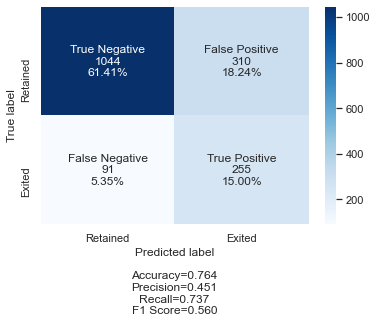

In [60]:
score_weighted = model2.evaluate(X_val, y_val)
print(score_weighted)

#This block of code controls the threshold. We will start with a threshold of 0.5
y_pred1 = model2.predict(X_val)
for i in range(len(y_val)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm1=confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Retained','Exited']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

We see a marked improvement for the recall score. Now we are starting to approach functional models. We can try finetuning the threshold using the AUC ROC curve now on validation set:

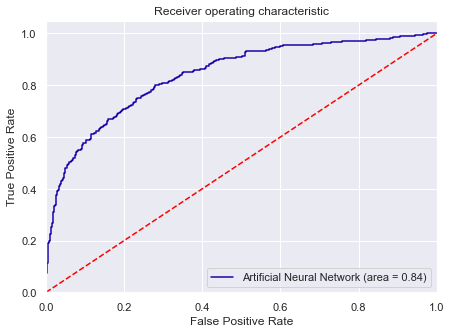

In [61]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve

logit_roc_auc_test = roc_auc_score(y_val, model2.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, model2.predict(X_val))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Artificial Neural Network (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [62]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_val, model2.predict(X_val))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc, 'is the optimal threshold')

0.41414085 is the optimal threshold


54/54 [==============================] - 0s 2ms/step - loss: 0.5165 - accuracy: 0.7641 - recall_1: 0.7370 - precision_1: 0.4513
[0.5164856314659119, 0.7641176581382751, 0.736994206905365, 0.45132744312286377]


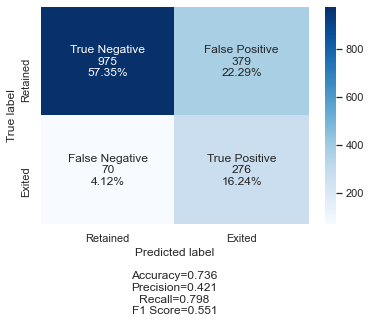

In [63]:
score_weighted = model2.evaluate(X_val, y_val)
print(score_weighted)

#This block of code controls the threshold. we will use the optimal threshold now from AUC ROC
y_pred1 = model2.predict(X_val)
for i in range(len(y_val)):
    if y_pred1[i]>optimal_threshold_auc_roc:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm1=confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Retained','Exited']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

47/47 [==============================] - 0s 954us/step - loss: 0.5044 - accuracy: 0.7713 - recall_1: 0.7451 - precision_1: 0.4625
[0.5043981671333313, 0.7713333368301392, 0.7450980544090271, 0.46247464418411255]


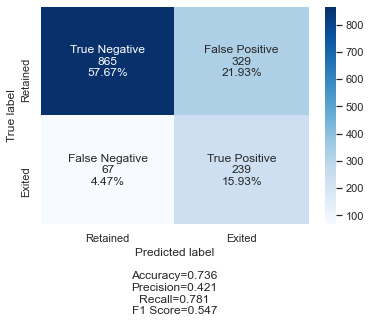

In [64]:
score_final_weighted_optimal_threshold = model2.evaluate(X_test,y_test)
print(score_final_weighted_optimal_threshold)


#This block of code controls the threshold. we will use the optimal threshold now from AUC ROC
y_pred1=model2.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>optimal_threshold_auc_roc: 
        y_pred1[i]=1 
    else:
        y_pred1[i]=0
        
cm1=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Retained','Exited']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')        

This appears to be the best model so far. You can actually change the threshold a little bit more however this will further reduce the already low precision. I will show you the results for a model with a slightly lower threshold:

47/47 [==============================] - 0s 1ms/step - loss: 0.5044 - accuracy: 0.7713 - recall_1: 0.7451 - precision_1: 0.4625
[0.5043981671333313, 0.7713333368301392, 0.7450980544090271, 0.46247464418411255]


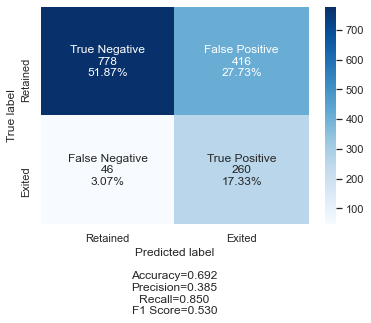

In [65]:
score_final_weighted_optimal_threshold = model2.evaluate(X_test,y_test)
print(score_final_weighted_optimal_threshold)


#This block of code controls the threshold. we will use the optimal threshold now from AUC ROC
y_pred1=model2.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>optimal_threshold_auc_roc-0.1: # Further Reducing the Threshold.
        y_pred1[i]=1 
    else:
        y_pred1[i]=0
        
cm1=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Retained','Exited']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')        

As you can see, by sacrificing 3-4% precision, we can gain 7% recall which results in a F1 score reduction of about 1.7% and an accuracy reduction of about 4%. I wouldn't neccessarily reccomend doing this. It depends on the economic aspects of the problem (How much does it cost to lose a customer vs try to retain customers who aren't intent on leaving?). The value of the threshold in the above plot is .1 less than the optimal value [.414-.1=.314]

# Final Model Test Performance:

47/47 [==============================] - 0s 1ms/step - loss: 0.5044 - accuracy: 0.7713 - recall_1: 0.7451 - precision_1: 0.4625
[0.5043981671333313, 0.7713333368301392, 0.7450980544090271, 0.46247464418411255]


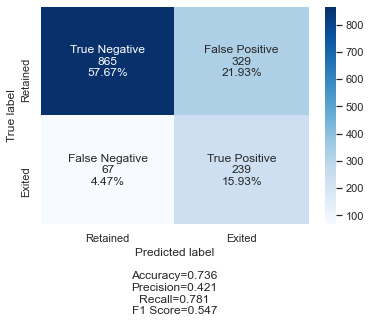

In [66]:
score_final_weighted_optimal_threshold = model2.evaluate(X_test,y_test)
print(score_final_weighted_optimal_threshold)


#This block of code controls the threshold. we will use the optimal threshold now from AUC ROC
y_pred1=model2.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>optimal_threshold_auc_roc: 
        y_pred1[i]=1 
    else:
        y_pred1[i]=0
        
cm1=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Retained','Exited']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')        

The final model is an ANN with 2 dense hidden layers with 121 neurons each and a 50% dropout. We used the  relu activation function and the He normal weight initializer while also accounting for the target class imbalance. The final threshold was then modified from .5 to .414 by selecting the optimal value from a ROC curve. This model is able to achieve 76.1% recall on the test set. 

### Scope of Improvement:
Many things were tried (i.e. feature engineering. many ANN architectures with many different activation functions and initialisations) to improve model performance however not much worked. The feature space available for solving this problem could be improved. More features with better predictive power of the target would greatly improve the success of this project. 

# Conclusion and Key Takeaways
This model could be used to predict which clients are at risk of exiting within the next 6 monthes (with 76% success), giving the bank a chance to attempt to prevent this. The reasons which these clients are choosing to leave is not completely evident from the limited information provided by the data but some interesting things that were noticed regarding this will be recapped:
* People who purchased the most things through the bank (4) always exited. 
* A higher proportion of people located in germany exit than any other location.